# Reinforcement Learning

In [1]:
%load_ext autoreload
%autoreload 2

import os
ROOT_DIR = os.getcwd()[:os.getcwd().rfind('NVcenter')]+ 'NVcenter'
os.chdir(ROOT_DIR)

from NVcenter import *
plt.style.use('qDNA-default')

In [4]:
# parameters
C13_pos = (8.728883757198979e-10, 0.0, 1.8558998769620693e-10) # Dominik
register_config = [('NV', (0, 0, 0), 0, {}), ('C13', C13_pos, 0, {})]
bath_configs = list( load_spin_baths('Dominik_C13', DATA_DIR).values() )[:10]

# Bell state between NV and C13
init_state = q.tensor( q.fock_dm(2,0), q.fock_dm(2,0) )
bell_gate = get_cnot_gate(2, 0, 1) * get_hada_gate(2, 0)
bell_state = bell_gate * init_state * bell_gate.dag()

kwargs = dict(suter_method=True, instant_pulses=True, verbose=False,
             old_state=bell_state, target=bell_state, env_approx_level='no_bath')

## Environment

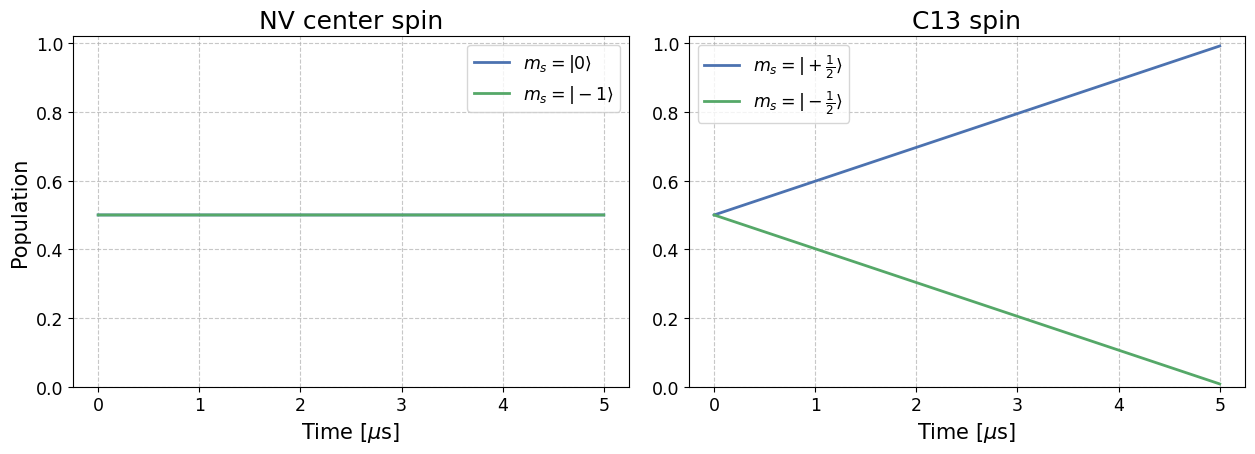

In [14]:
env = Environment(register_config, bath_configs, **kwargs)
env.reset()
new_states = []
new_states.append( env.old_state )
env.step([5e-6, 0, 0])
new_states.append( env.old_state )

# plot the results
fig, ax = plot_pops([0, 5e-6], new_states)

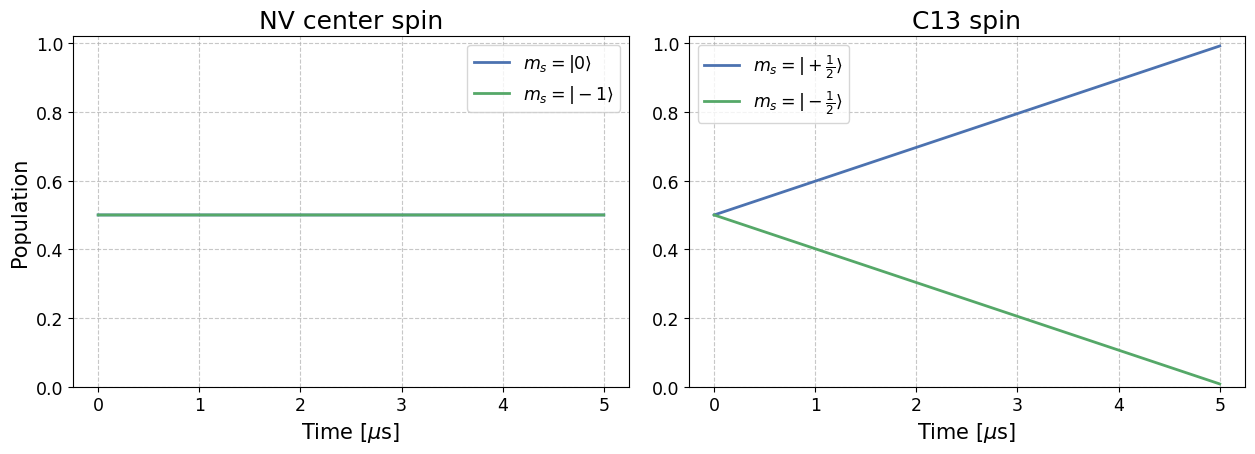

In [15]:
env = Environment(register_config, bath_configs, **kwargs)
env.reset()
new_states = []
new_states.append( env.old_state )
env.step([5e-6, 0, 0])
new_states.append( env.old_state )

# plot the results
fig, ax = plot_pops([0, 5e-6], new_states)